# Part I - Prosper Loan Data Exploration
## by Franck Loïc NOUMOU TCHOMEGNI

## Introduction
Ce projet se concentrera sur la découverte des caractéristiques/facteurs qui sont associés à diverses **cotes de prospérité des prêts**. Le `ProsperLoanData` qui sera utilisé dans ce projet contient **81 colonnes** d'informations sur **113 937 prêts** prospères répertoriés dans différentes villes, sur une période de 6 ans (2009 - 2014). Les données seront nettoyées, analysées et les conclusions tirées.


## Preliminary Wrangling


In [1]:
# Mise à jour de seaborn pour une meilleure visualisation
!pip install seaborn --upgrade
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

    100% |████████████████████████████████| 296kB 10.7MB/s ta 0:00:01  24% |███████▉                        | 71kB 5.5MB/s eta 0:00:01
    100% |████████████████████████████████| 11.5MB 3.4MB/s eta 0:00:01   24% |███████▊                        | 2.8MB 32.9MB/s eta 0:00:01    64% |████████████████████▋           | 7.4MB 30.7MB/s eta 0:00:01    77% |█████████████████████████       | 9.0MB 34.5MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 3.4MB/s eta 0:00:01   13% |████▌                           | 1.9MB 29.7MB/s eta 0:00:01    25% |████████▏                       | 3.4MB 29.6MB/s eta 0:00:01    36% |███████████▊                    | 4.9MB 30.9MB/s eta 0:00:01    58% |██████████████████▋             | 7.8MB 30.3MB/s eta 0:00:01    78% |█████████████████████████▎      | 10.6MB 30.5MB/s eta 0:00:01    98% |███████████████████████████████▋| 13.2MB 31.0MB/s eta 0:00:01
    100% |████████████████████████████████| 49.4MB 911kB/s eta 0:00:01  2% |▊                         

In [2]:
sb.__version__

'0.11.2'

In [3]:
df_prosperloan = pd.read_csv('prosperLoanData.csv')

In [4]:
df_prosperloan.shape

(113937, 81)

In [5]:
df_prosperloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
df_prosperloan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [7]:
df_prosperloan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [8]:
sum(df_prosperloan.duplicated())

0

In [9]:
#Obtenir le nombre de valeurs manquantes dans chaque colonne et exclure les colonnes contenant 0 valeurs manquantes
missing = df_prosperloan.isna().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=False)

GroupKey                               100596
LoanFirstDefaultedCycleNumber           96985
ScorexChangeAtTimeOfListing             95009
ProsperPrincipalOutstanding             91852
ProsperPrincipalBorrowed                91852
ProsperPaymentsOneMonthPlusLate         91852
ProsperPaymentsLessThanOneMonthLate     91852
OnTimeProsperPayments                   91852
TotalProsperPaymentsBilled              91852
TotalProsperLoans                       91852
CreditGrade                             84984
ClosedDate                              58848
EstimatedReturn                         29084
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
ProsperScore                            29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
DebtToIncomeRatio                        8554
EmploymentStatusDuration                 7625
AmountDelinquent                         7622
BankcardUtilization               

Il semble qu'il y ait beaucoup de valeurs nulles pour la plupart des variables de l'ensemble de données puisque je ne suis intéressé que par l'étude de certaines des fonctionnalités de cet ensemble de données, je vais sous-ensembler la trame de données pour extraire les fonctionnalités d'intérêt pour mon analyse et supprimer le null pour ce sous-ensemble de données

In [10]:
sub_data =  [
    'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

df_prosperloan_sub = df_prosperloan[sub_data]

In [11]:
df_prosperloan_sub.sample(5)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
103445,36,Current,0.29537,0.2566,D,2.0,1,Employed,4.0,4948.166667,NaN,8000,2013-04-26 00:00:00,0,1
5376,36,Completed,0.22135,0.1990,C,10.0,7,Full-time,4.0,6833.333333,NaN,2000,2010-05-20 00:00:00,0,83
59202,36,Chargedoff,0.21739,0.2100,NaN,NaN,0,Self-employed,8.0,5000.000000,1.0,4700,2007-11-21 00:00:00,0,124
29518,36,Completed,0.35797,0.3177,HR,4.0,1,Employed,2.0,5913.583333,NaN,2000,2012-03-19 00:00:00,0,6
25291,60,Current,0.09826,0.0961,AA,10.0,1,Employed,0.0,18333.000000,NaN,25000,2012-03-26 00:00:00,0,504


In [12]:
df_prosperloan_sub.shape

(113937, 15)

In [13]:
missing_2 = df_prosperloan_sub.isnull().sum()
missing_2.sort_values(ascending=False)

TotalProsperLoans            91852
ProsperScore                 29084
ProsperRating (Alpha)        29084
EmploymentStatus              2255
DelinquenciesLast7Years        990
BorrowerAPR                     25
Investors                        0
Recommendations                  0
LoanOriginationDate              0
LoanOriginalAmount               0
StatedMonthlyIncome              0
ListingCategory (numeric)        0
BorrowerRate                     0
LoanStatus                       0
Term                             0
dtype: int64

Étant donné que Prosper n'utilise son propre classement Prosper que depuis **2009**, nous avons beaucoup de valeurs manquantes dans la colonne `ProsperRating (Alpha)`, supprimons ces valeurs manquantes :

In [14]:
df_prosperloan_sub = df_prosperloan_sub.dropna(subset=['ProsperRating (Alpha)']).reset_index()

Convertissons`LoanOriginationDate` en **datetime**:

In [15]:
df_prosperloan_sub['LoanOriginationDate'] = pd.to_datetime(df_prosperloan_sub['LoanOriginationDate'])

In [16]:
df_prosperloan_sub.isnull().sum().sort_values(ascending=False)

TotalProsperLoans            65056
Investors                        0
Recommendations                  0
LoanOriginationDate              0
LoanOriginalAmount               0
StatedMonthlyIncome              0
DelinquenciesLast7Years          0
EmploymentStatus                 0
ListingCategory (numeric)        0
ProsperScore                     0
ProsperRating (Alpha)            0
BorrowerRate                     0
BorrowerAPR                      0
LoanStatus                       0
Term                             0
index                            0
dtype: int64

D'apres [Prosper Loan Data - Variable Definition](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) en cas d'absence d'historique de crédit sur Prosper, la valeur de la colonne `TotalProsperLoans` sera NaN, remplaçons-la par 0 :

In [17]:
df_prosperloan_sub['TotalProsperLoans'] = df_prosperloan_sub['TotalProsperLoans'].fillna(0)

In [18]:
df_prosperloan_sub.isna().values.sum()

0

In [19]:
df_prosperloan_sub.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,84853.0,56958.246850,32885.220638,1.00000,28507.00000,56960.00000,85420.000000,1.139360e+05
Term,84853.0,42.486135,11.640346,12.00000,36.00000,36.00000,60.000000,6.000000e+01
BorrowerAPR,84853.0,0.226658,0.079916,0.04583,0.16328,0.21945,0.292540,4.239500e-01
BorrowerRate,84853.0,0.196022,0.074631,0.04000,0.13590,0.18750,0.257400,3.600000e-01
ProsperScore,84853.0,5.950067,2.376501,1.00000,4.00000,6.00000,8.000000,1.100000e+01
ListingCategory (numeric),84853.0,3.312647,4.364277,0.00000,1.00000,1.00000,3.000000,2.000000e+01
DelinquenciesLast7Years,84853.0,3.659435,9.347957,0.00000,0.00000,0.00000,2.000000,9.900000e+01
StatedMonthlyIncome,84853.0,5931.174803,8239.943740,0.00000,3434.00000,5000.00000,7083.333333,1.750003e+06
TotalProsperLoans,84853.0,0.340789,0.726235,0.00000,0.00000,0.00000,0.000000,8.000000e+00
LoanOriginalAmount,84853.0,9083.440515,6287.860058,1000.00000,4000.00000,7500.00000,13500.000000,3.500000e+04


### What is the structure of your dataset?

Un ensemble de données de Prosper, qui est la première plate-forme de prêt du marché américain, avec plus de 7 milliards de dollars de prêts financés. Cet ensemble de données contient 113 937 prêts avec 81 variables sur chaque prêt, y compris le montant du prêt `LoanOriginalAmount`, le taux de l'emprunteur (ou le taux d'intérêt)`borrower rate`, le statut actuel du prêt, le revenu de l'emprunteur, le statut d'emploi de l'emprunteur, l'historique de crédit de l'emprunteur et les dernières informations de paiement.

### What is/are the main feature(s) of interest in your dataset?

`ProsperRating (Alpha)`

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Je pense que la `ProsperRating (Alpha)` aura le plus grand impact sur les prêts. Aussi je m'attends à ce que le `LoanOriginalAmount` joue un rôle majeur. La `ProsperRating (Alpha)` dépendra de `StatedMonthlyIncome` et de `EmploymentStatus`.

## Univariate Exploration




In [20]:
#Choisir la couleur par defaut
dcolor = sb.color_palette()[0]

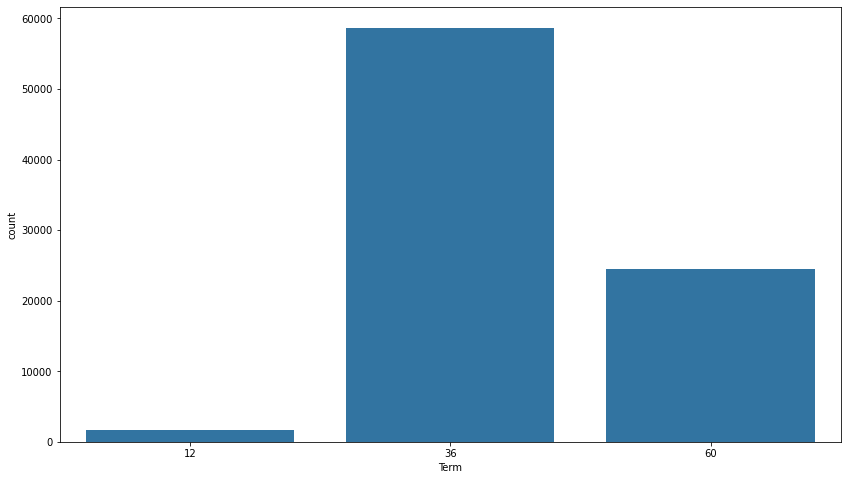

In [21]:
plt.figure(figsize=[14, 8])
sb.countplot(data = df_prosperloan_sub, x = 'Term', color=dcolor);

Pour `Term` : il existe trois options : 36, 60 et 12 mois. le `Term` le plus courant pour les prêts dans l'ensemble de données est de 36 mois. Ensuite, vérifions le `LoanStatus` :

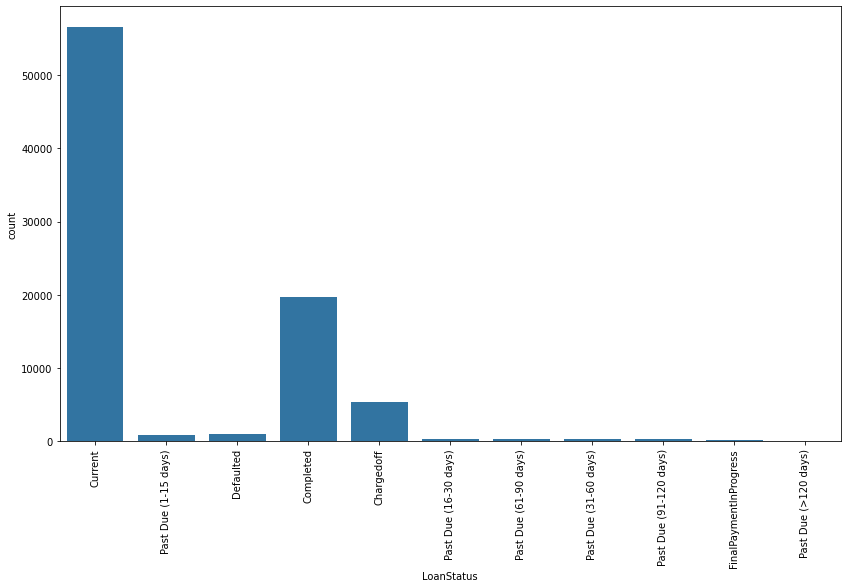

In [22]:
plt.figure(figsize=[14, 8])
sb.countplot(data = df_prosperloan_sub, x = 'LoanStatus', color = dcolor)
plt.xticks(rotation=90);

La plupart des prêts de l'ensemble de données sont en fait des prêts **Current**. Suivent avec une grande fréquence les prêts **Completed**, suivis des **Chargedoff**, tandis que les prêts des catégories **Default** et **Past Due** représentent une minorité. Continuons avec - `BorrowerRate` :

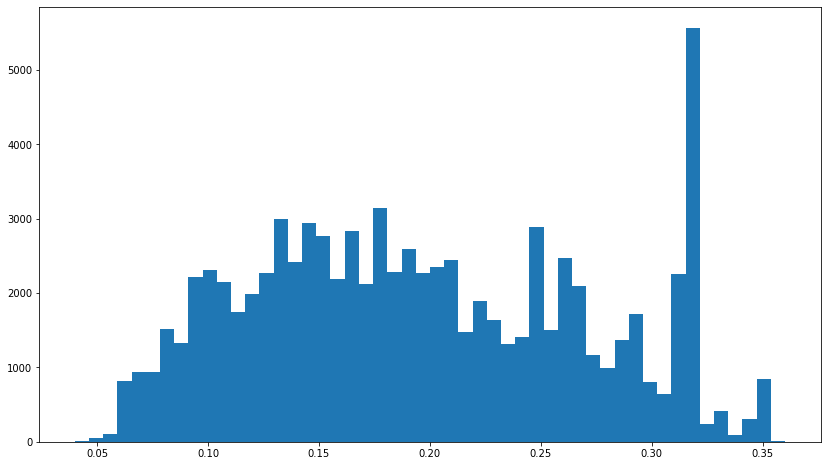

In [23]:
plt.figure(figsize=[14,8])
plt.hist(data=df_prosperloan_sub, x='BorrowerRate', bins=50, color = dcolor);

`BorrowerRate` semble être bimodale avec un premier pic autour de 0.18, un pic plus grand aux alentours de 0.33. Passons à `ProsperRating (Alpha)`

In [24]:
# Parce que `Prosper Rating (Alpha)` est une variable catégorielle ordinale (de la note A la plus élevée à la plus faible HR),
#nous devons le convertir à l'aide de pandas :
ordinal_list = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']


ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_list)
df_prosperloan_sub['ProsperRating (Alpha)'] = df_prosperloan_sub['ProsperRating (Alpha)'].astype(ordered_var)

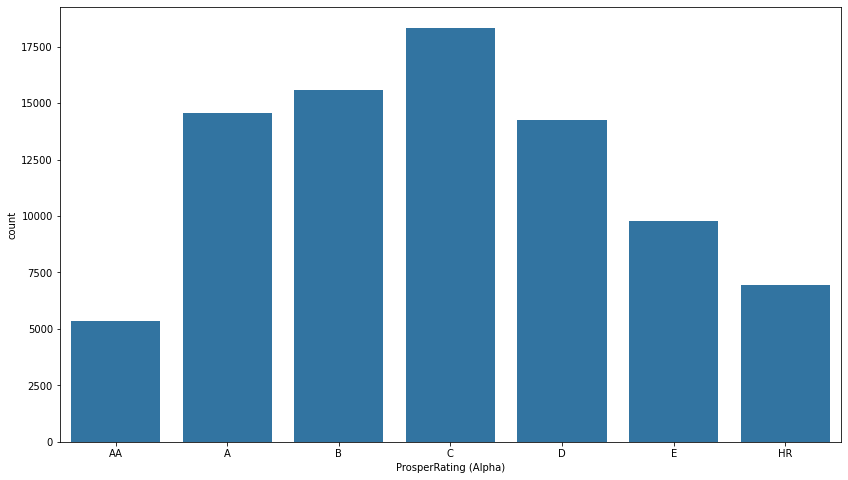

In [25]:
plt.figure(figsize=[14,8])
sb.countplot(data=df_prosperloan_sub, x='ProsperRating (Alpha)', color=dcolor);

La note AA la plus élevée et la note la plus basse HR sont les moins courantes et la note C étant la plus courante. Voyons maintenant `ListingCategory (numeric)` :

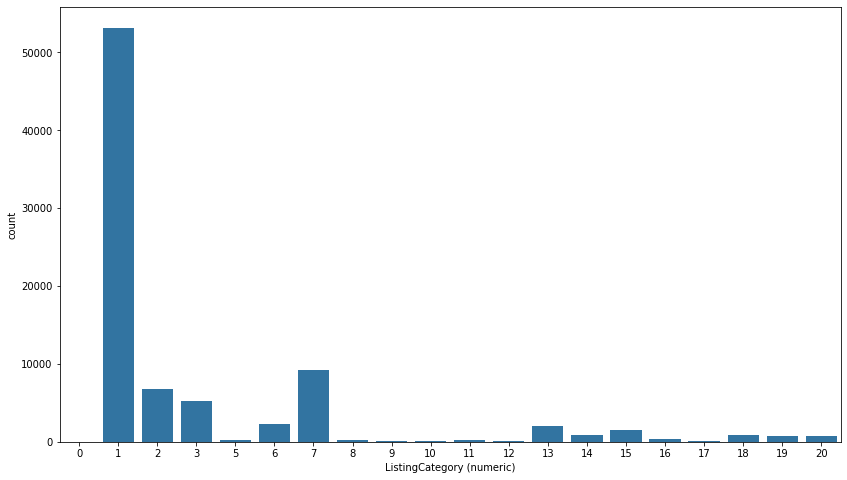

In [26]:
plt.figure(figsize=[14,8])
sb.countplot(data=df_prosperloan_sub, x='ListingCategory (numeric)', color=dcolor);

Tirés de [Prosper Loan Data - Variable Definition](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

La majorité des prêts appartiennent à la catégorie `Debt Consolidation` suivi de `Other` et de `Home Improvement`. Passons ensuite à `EmploymentStatus`

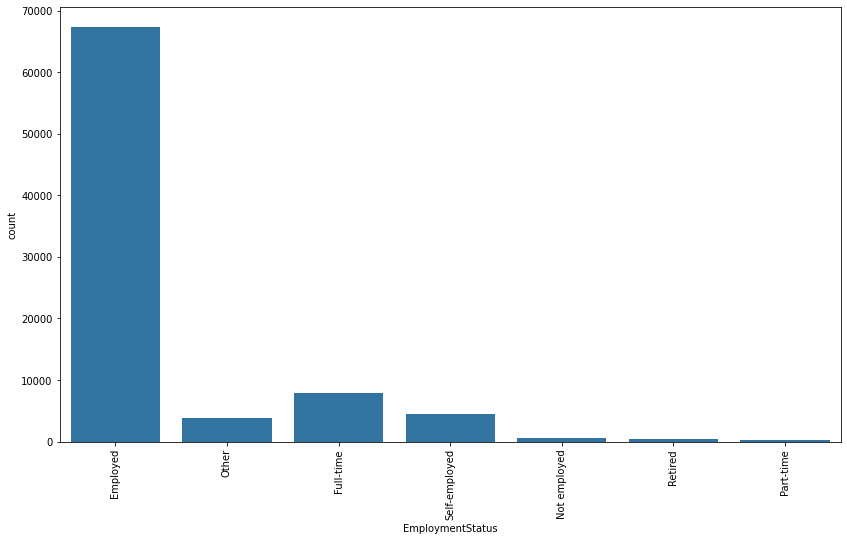

In [27]:
plt.figure(figsize=[14,8])
sb.countplot(data=df_prosperloan_sub, x='EmploymentStatus', color=dcolor)
plt.xticks(rotation=90);

La majorité des emprunteurs sont `Employed`. Regardons `DelinquenciesLast7Years`

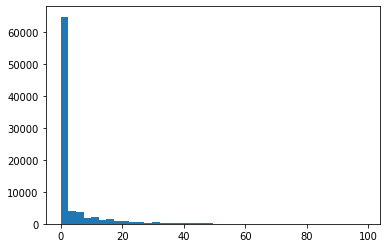

In [28]:
plt.hist(data=df_prosperloan_sub, x='DelinquenciesLast7Years', bins=40, color=dcolor);

La majorité des emprunteurs ont **0** délinquances à leurs actifs suivis d'une toute petite minorité qui ont entre 20 et 100 délinquances à leurs actifs. passons à `StatedMonthlyIncome`

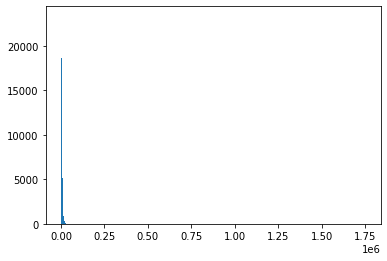

In [29]:
plt.hist(data=df_prosperloan_sub, x='StatedMonthlyIncome', bins=1000, color=dcolor);

La distribution de `StatedMonthlyIncome` est fortement asymétrique vers la droite. Vérifions les valeurs aberrantes:

In [30]:
# Si une donnée est éloignée de la moyenne + 3 écarts-types, elle sera considérée comme une valeur aberrante
income_std = df_prosperloan_sub['StatedMonthlyIncome'].std()
income_mean = df_prosperloan_sub['StatedMonthlyIncome'].mean()
limit = income_mean + income_std * 3
len(df_prosperloan_sub[df_prosperloan_sub['StatedMonthlyIncome'] >= limit])

245

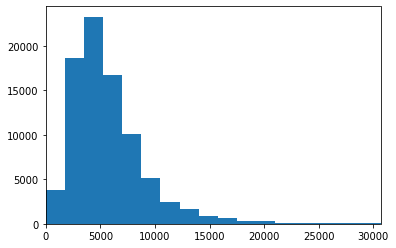

In [31]:
plt.hist(data=df_prosperloan_sub, x='StatedMonthlyIncome', bins=1000, color=dcolor);
plt.xlim(0, limit);

Avec une limite de moyenne + trois écarts-types, la distribution de `StatedMonthlyIncome` présente toujours un biais vers la droite notable, mais nous pouvons maintenant voir que le plus populaire est environ de 5 000. Étape suivante - `TotalProsperLoans` :

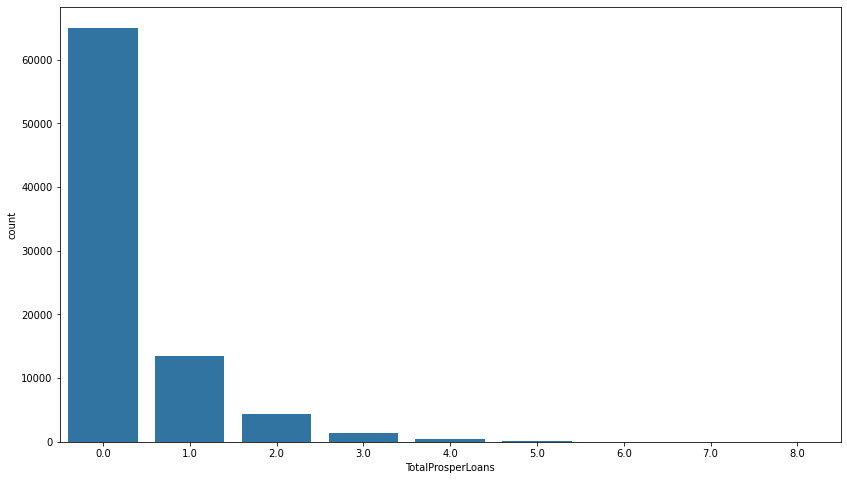

In [32]:
plt.figure(figsize=[14,8])
sb.countplot(data=df_prosperloan_sub, x='TotalProsperLoans', color=dcolor);

Pour la plupart des clients, il s'agit de leur premier prêt chez Prosper, une petite minorité de clients a déjà emprunté 1, 2 ou 3 prêts, le maximum est de 8 prêts. Prochaine étape - `LoanOriginalAmount` :

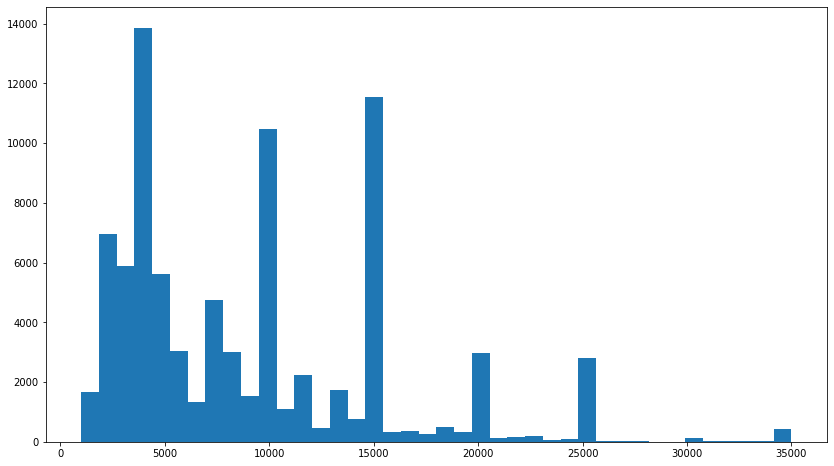

In [33]:
plt.figure(figsize=[14,8])
plt.hist(data=df_prosperloan_sub, x='LoanOriginalAmount', bins=40, color=dcolor);

Il semble que la plupart des prêts soient inférieurs à 15 000. Passons à `LoanOriginationDate` :

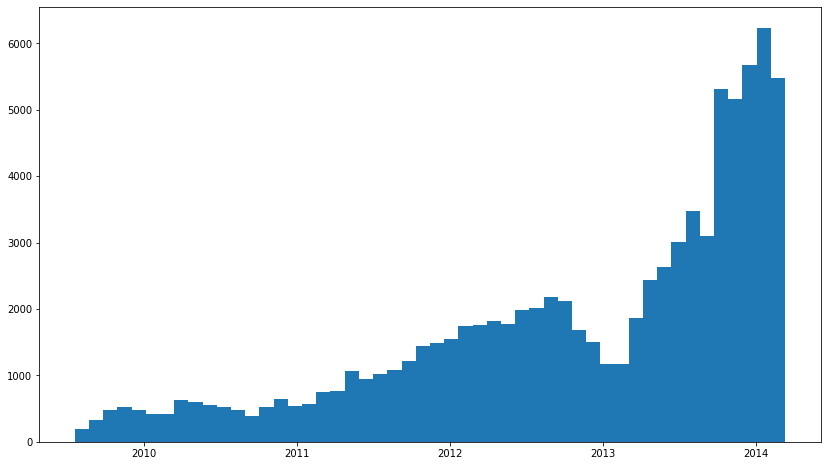

In [34]:
plt.figure(figsize=[14,8])
plt.hist(data=df_prosperloan_sub, x='LoanOriginationDate', bins=50, color=dcolor);

Les données vont d'approximativement **2009** au **2014**. On constate clairement une grosse croissance du nombre de prêts depuis le début de l'année 2013. Point suivant - `Recommendations` :

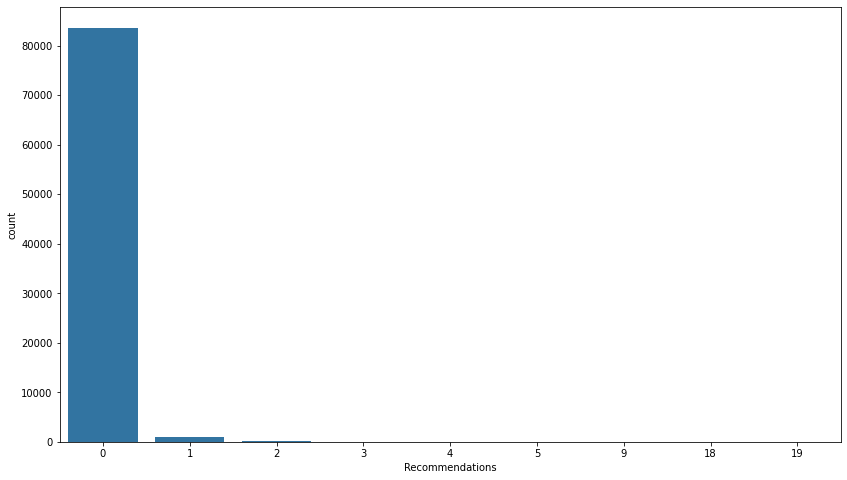

In [35]:
plt.figure(figsize=[14,8])
sb.countplot(data=df_prosperloan_sub, x='Recommendations', color=dcolor);

La majorité des prêts ont été attribués avec **0** recommandations, passons à `Investors`

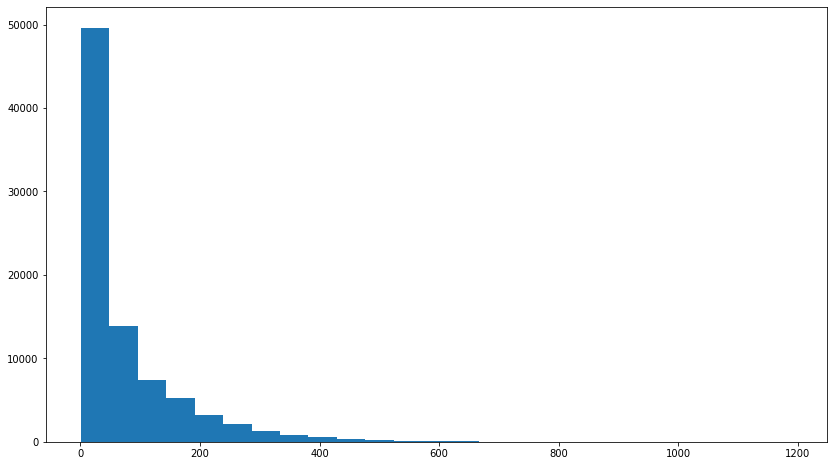

In [36]:
plt.figure(figsize=[14,8])
plt.hist(data=df_prosperloan_sub, x='Investors', bins=25, color=dcolor);

La plupart des prêts n'ont qu'un seul investisseur et la majorité moins de 200 investisseurs.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Les `ProsperRating` sont presque normalement distribuées. La distribution des `StatedMonthlyIncome` est très délicate : avec beaucoup de valeurs aberrantes et une très large gamme de valeurs, car cela est évidemment basé sur l'auto-déclaration des emprunteurs, je pense qu'il y a beaucoup de valeurs erronées, nous allons nous débattre ci-dessous . Je n'ai pas eu l'impression que des transformations d'échelle puissent être utiles ici. La plupart des prêts sont inférieurs à 15 000, il semble que la plupart des prêts soient des incréments de 5 000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

La majorité des `LoanStatus` sont en fait des prêts en cours. Étant donné que notre objectif principal est de définir les facteurs déterminants du résultat du prêt, nous ne sommes pas intéressés par les prêts en cours (et les prêts avec une période de retard spécifiée), les prêts annulés peuvent également être considérés comme en défaut. Nous apporterons quelques ajustements aux données à l'étape suivante :

In [37]:
# Vérifions le nombre de chaque valeur dans le 'LoanStatus'
df_prosperloan_sub['LoanStatus'].value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [38]:
# Laissons uniquement les Completed, Chargedoff, Defaulted
cond = (df_prosperloan_sub['LoanStatus'] == 'Completed') | (df_prosperloan_sub['LoanStatus'] == 'Defaulted') | (df_prosperloan_sub['LoanStatus'] == 'Chargedoff')
df_prosperloan_sub = df_prosperloan_sub[cond]

In [39]:
# Changeons les chargedoff en defaulted
def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']

In [40]:
df_prosperloan_sub['LoanStatus'] = df_prosperloan_sub.apply(change_to_defaulted, axis=1)

In [41]:
#Reverifions le nombre de chaque valeur à nouveau
df_prosperloan_sub['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

`ListingCategory (numeric)` est configuré comme numérique et la plupart des valeurs ont une fréquence très basse, pour une visualisation plus facile, changeons-le en catégorique et réduisons le nombre de catégories :

In [42]:
#Reduisons le nombre de categories
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categories(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]

In [43]:
df_prosperloan_sub['ListingCategory (numeric)'] = df_prosperloan_sub.apply(reduce_categories, axis=1)

In [44]:
df_prosperloan_sub['ListingCategory (numeric)'].value_counts()

Debt Consolidation    12740
Other                  7083
Home Improvement       2612
Business               2366
Auto                   1204
Name: ListingCategory (numeric), dtype: int64

Supprimons également les valeurs aberrantes de `StatedMonthlyIncome`

In [45]:
# Recuperons les données inférieures à la valeur 'limit'
df_prosperloan_sub = df_prosperloan_sub[df_prosperloan_sub['StatedMonthlyIncome'] < limit]

## Bivariate Exploration


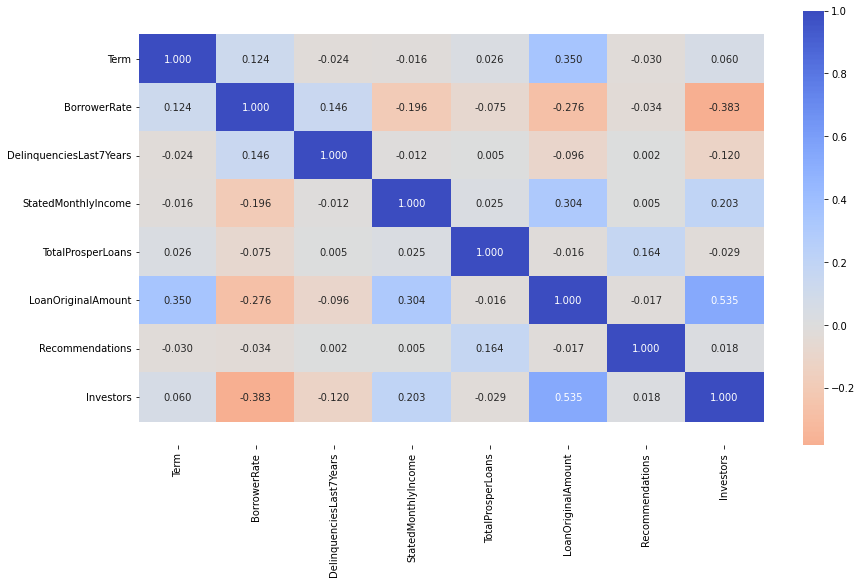

In [46]:
# Recuperons les variables numériques
numeric_vars = ['Term', 'BorrowerRate', 'DelinquenciesLast7Years', 'StatedMonthlyIncome',
                'TotalProsperLoans', 'LoanOriginalAmount', 'Recommendations', 'Investors'
               ]

plt.figure(figsize = [14, 8])
ax = sb.heatmap(df_prosperloan_sub[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'coolwarm_r', center = 0)

bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);

- Il existe une corrélation positive modérée entre `LoanOriginalAmount` et `Term`, `LoanOriginalAmount` et le nombre de
`Investors`, `LoanOriginalAmount` et `StatedMonthlyIncome`, `Recommendations` et `TotalProsperLoans`, nombre d'impayés et taux d'emprunteurs.

- Il existe également une corrélation négative modérée entre `LoanOriginalAmount` et `BorrowerRate`, `Investors` et `BorrowerRate`.

<Figure size 720x720 with 0 Axes>

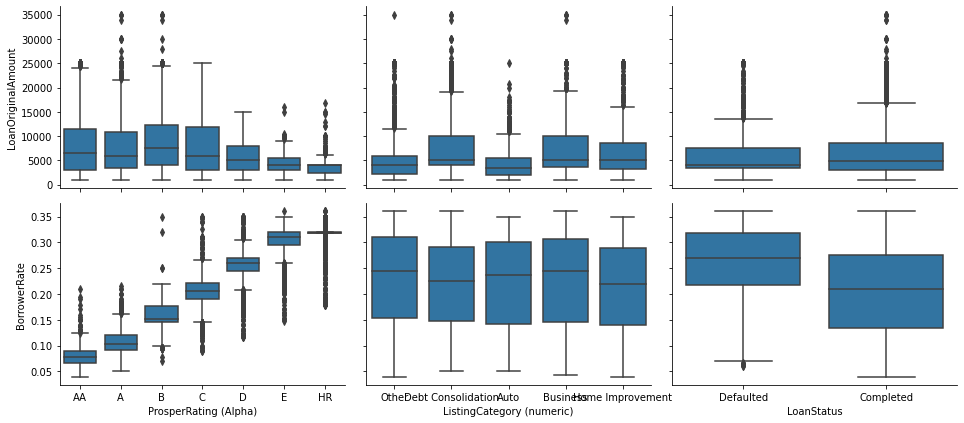

In [47]:
numeric_vars = ['LoanOriginalAmount', 'BorrowerRate']
categoric_vars = ['ProsperRating (Alpha)', 'ListingCategory (numeric)', 'LoanStatus']


def boxgrid(x, y, **kwargs):
    sb.boxplot(x, y, color = dcolor)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_prosperloan_sub, y_vars = numeric_vars, x_vars = categoric_vars, height=3, aspect=1.5)
g.map(boxgrid);
plt.show();

Les emprunteurs dont `ProsperRating (Alpha)` est inférieure reçoivent en général un montant de prêt inférieur et un taux d'intérêt plus élevé. Les montants empruntés à des fins **Other** et **Auto** sont généralement inférieurs à ceux des autres catégories, le taux ne fluctue pas beaucoup entre les différentes fins des prêts. Les prêts en souffrance ont tendance à être un peu moins importants que les prêts terminés. Le taux d'emprunteur pour les prêts en défaut est considérablement plus élevé que pour les prêts achevés, mais cela est dû au fait que les clients dont la cote est inférieure obtiennent un taux d'intérêt plus élevé.


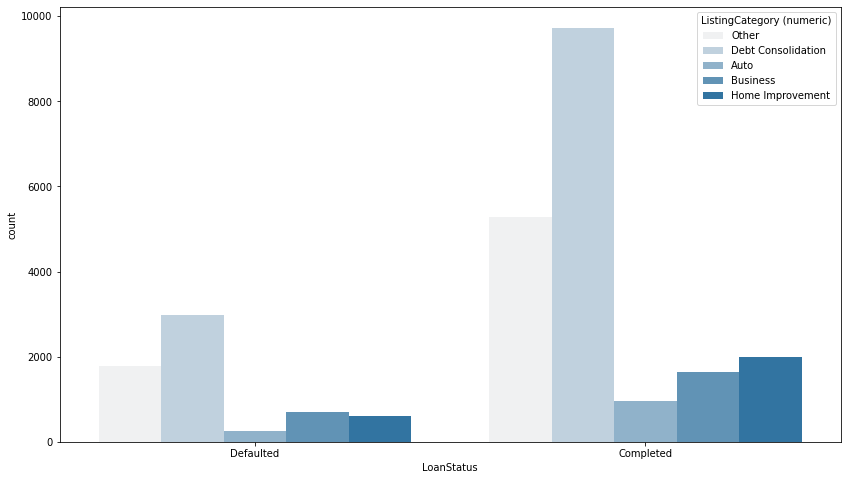

In [48]:
plt.figure(figsize=[14,8])
sb.countplot(data=df_prosperloan_sub, x='LoanStatus', hue='ListingCategory (numeric)', color=dcolor);

Visuellement, nous pouvons voir que `Debt Consolidation` et `Other` ont les plus grands pics dans `Defaulted` et `Completed`
Passons à `LoanStatus` et `ProsperRating (Alpha)` :

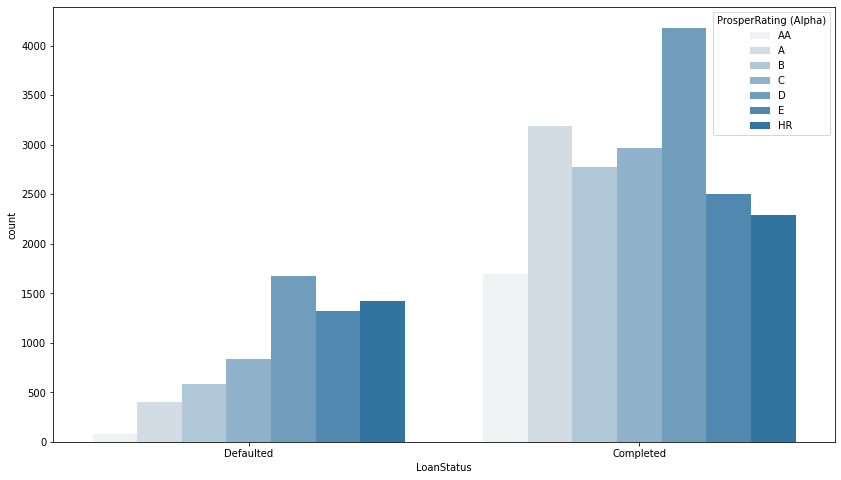

In [49]:
plt.figure(figsize=[14,8])
sb.countplot(data=df_prosperloan_sub, x='LoanStatus', hue='ProsperRating (Alpha)', color=dcolor);

C'est en fait assez intéressant : la note la plus fréquente parmi les prêts `Defaulted` est en fait <b>D</b>, ce qui est contraire à la logique courante - la note la plus courante pour les dettes en défaut devrait être <b>HR</b>. Passons à `LoanStatus` et `Investors` sont liés :

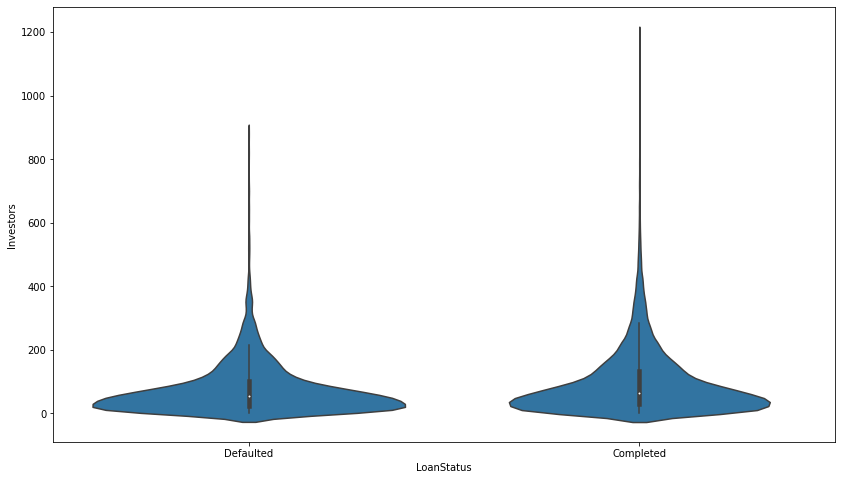

In [50]:
plt.figure(figsize=[14,8])
sb.violinplot(data = df_prosperloan_sub, x = 'LoanStatus', y = 'Investors', color = dcolor);

Les crédits `Defaulted` ont généralement moins d'investisseurs. Voyons ensuite le lien entre `EmploymentStatus` et `LoanStatus`

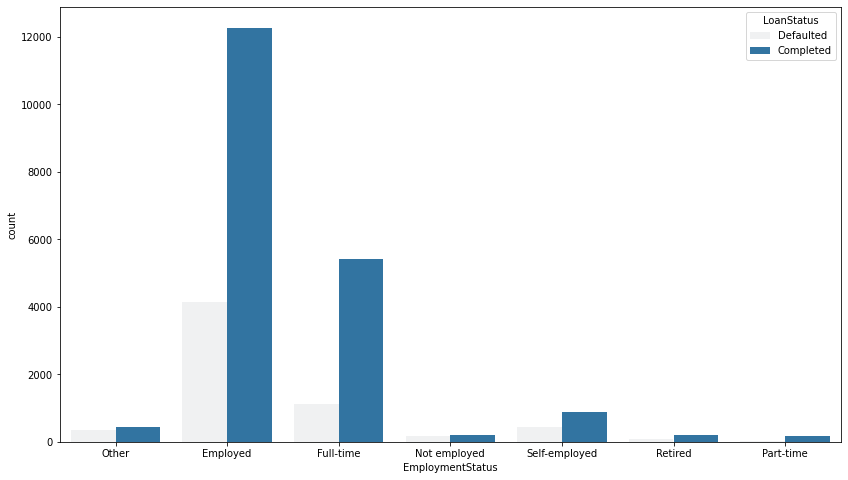

In [51]:
plt.figure(figsize = [14, 8])
sb.countplot(data=df_prosperloan_sub, x='EmploymentStatus', hue='LoanStatus', color=dcolor);

Visuellement, il semble que les emprunteurs ayant `EmploymentStatus` **Not employed** et **Part-time** sont plus susceptibles de faire défaut sur le prêt. Examinons ensuite de plus près `LoanStatus` et `LoanOriginalAmount`.

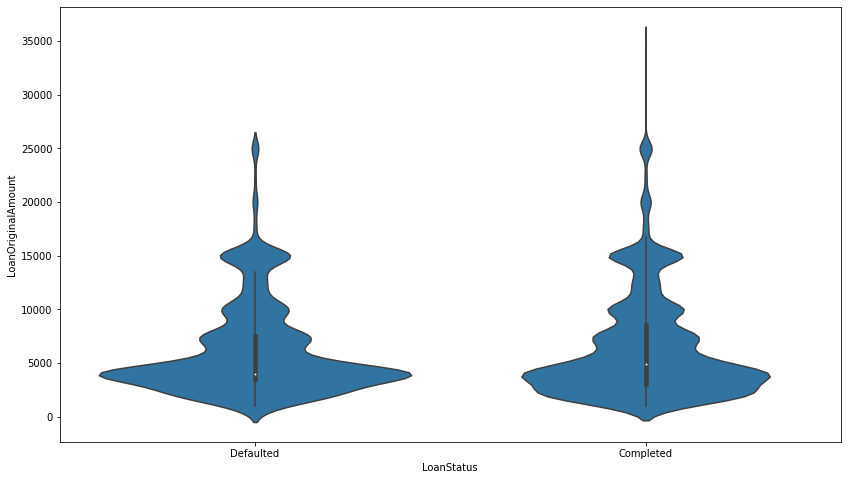

In [52]:
plt.figure(figsize=[14,8])
sb.violinplot(data = df_prosperloan_sub, x = 'LoanStatus', y = 'LoanOriginalAmount', color = dcolor);

Les `LoanOriginalAmount` **Defaulted** ont tendance à être inférieurs aux `LoanOriginalAmount` **Completed**. Ensuite, vérifions `Term` et `LoanStatus`.

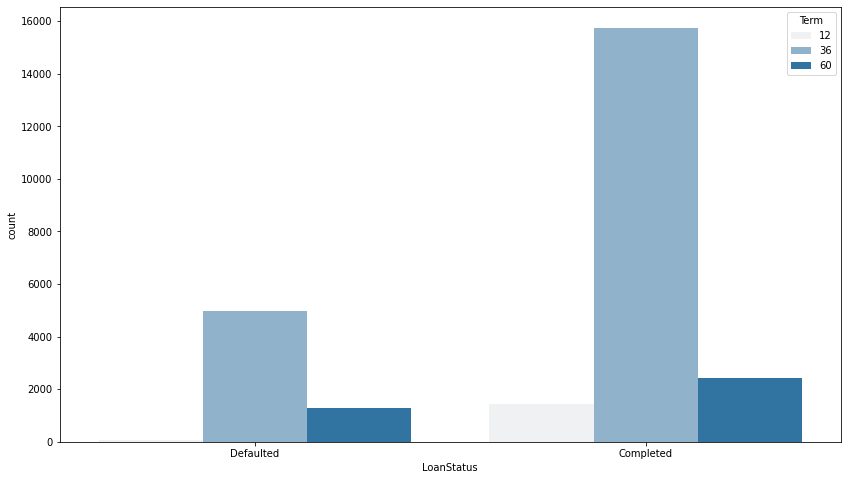

In [53]:
plt.figure(figsize=[14,8])
sb.countplot(data=df_prosperloan_sub, x='LoanStatus', hue='Term', color=dcolor);

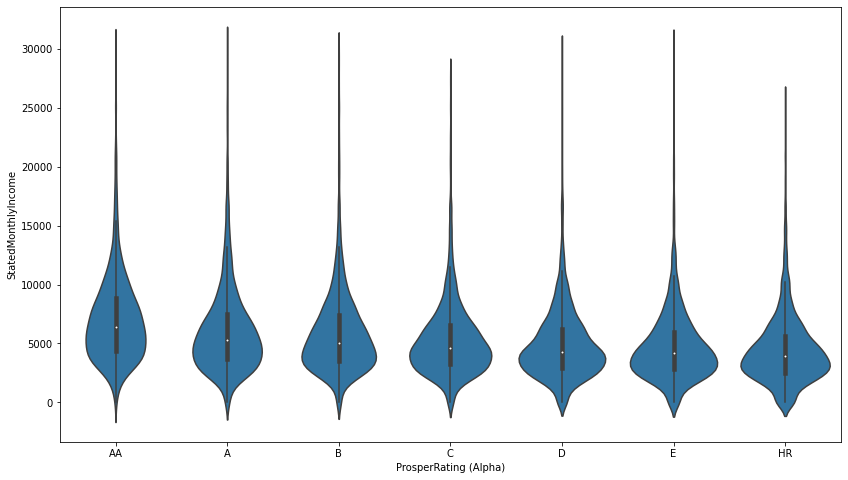

In [54]:
plt.figure(figsize=[14,8])
sb.violinplot(data = df_prosperloan_sub, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', color = dcolor);

Comme on pouvait s'y attendre, les personnes ayant un revenu mensuel plus élevé ont tendance à avoir une note plus élevée. Voyons la notation et le nombre d'investisseurs :

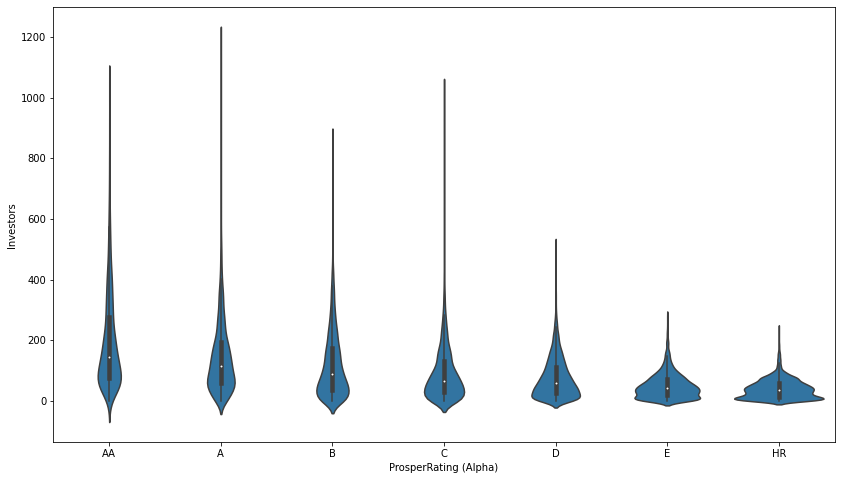

In [55]:
plt.figure(figsize=[14,8])
sb.violinplot(data = df_prosperloan_sub, x = 'ProsperRating (Alpha)', y = 'Investors', color = dcolor);

Les emprunteurs les mieux notés ont en moyenne plus d'investisseurs. Ensuite, vérifions `ProsperRating (Alpha)`et `TotalProsperLoans` :

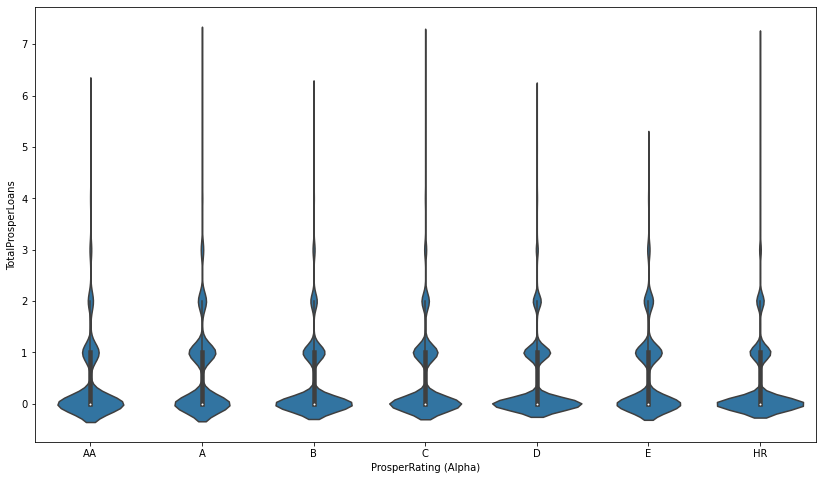

In [56]:
plt.figure(figsize=[14,8])
sb.violinplot(data = df_prosperloan_sub, x = 'ProsperRating (Alpha)', y = 'TotalProsperLoans', color = dcolor);

Il n'y a aucune relation entre `ProsperRating (Alpha)` et `TotalProsperLoans`. Ensuite, vérifions `ProsperRating (Alpha)` et `EmploymentStatus`.  

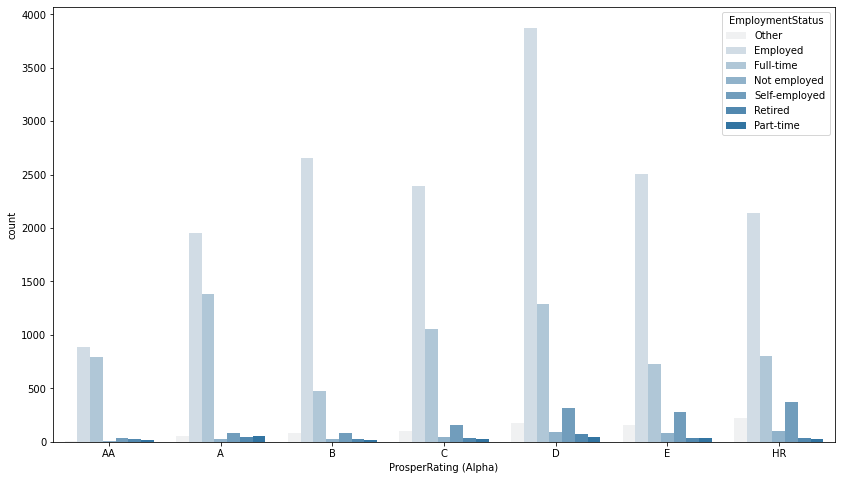

In [57]:
plt.figure(figsize = [14, 8])
sb.countplot(data = df_prosperloan_sub, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', color=dcolor);

Les notes les plus basses semblent avoir de plus grandes proportions de personnes ayant le statut d'emploi <b>Not Employed, Self-employed, Retired and Part-Time</b>. Ensuite, vérifions `DelinquenciesLast7Years` et `ProsperRating (Alpha)`.

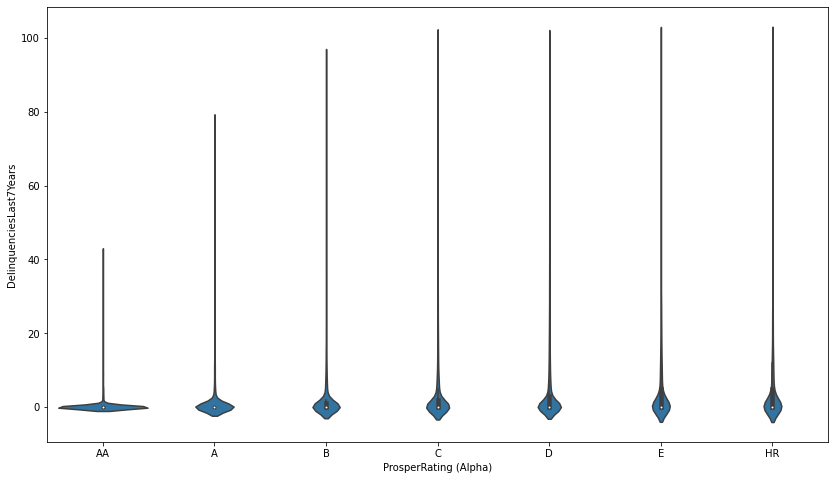

In [58]:
plt.figure(figsize = [14, 8])
sb.violinplot(data = df_prosperloan_sub, x = 'ProsperRating (Alpha)', y = 'DelinquenciesLast7Years', color = dcolor);

Les personnes ayant la cote AA la plus élevée ont tendance à avoir moins de délinquance que les autres.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Comme prévu, les crédits par défaut ont tendance à être accordés aux personnes ayant une note inférieure. Les affaires et l'amélioration de l'habitat semblent être des catégories plus risquées. Le `Borrower Rate` a tendance à être plus élevé pour les crédits en défaut. Les crédits à long terme (60 mois) sont plus risqués que les crédits à court terme (12 mois). Le `Borrower Rate` pour les personnes à faible notation est plus élevé. Un revenu mensuel élevé correspond à une note plus élevée. Le `EmploymentStatus` des personnes ayant des cotes inférieures tend à être `Not employed`, `Self-employed`, `Retired` ou `Part-time`.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Une chose intéressante que j'ai observée est que la ProsperRating D est la note la plus fréquente parmi les defaulted LoanStatus.

## Multivariate Exploration


Examinons la relation entre `Term, BorrowerRate, DelinquenciesLast7Years, StatedMonthlyIncome, LoanOriginalAmount, LoanStatus`.

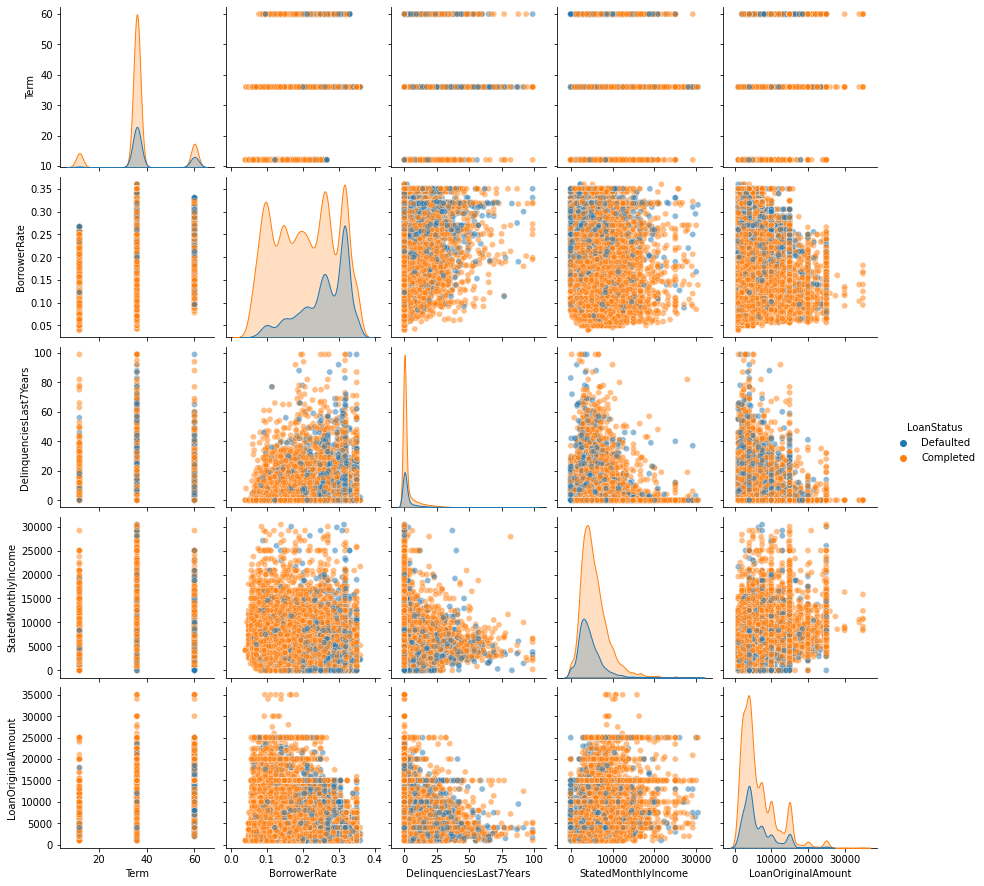

In [59]:
cols = [
    'Term', 'BorrowerRate', 'DelinquenciesLast7Years', 'StatedMonthlyIncome',
    'LoanOriginalAmount', 'LoanStatus'
       ]
g = sb.pairplot(df_prosperloan_sub[cols], hue='LoanStatus',
                plot_kws={'alpha': 0.5, 'edgecolor': 'white'})
fig = g.fig;

Parmi les variables numériques, le nombre de `DelinquenciesLast7Years` et `BorrowerRate` semblent être les meilleurs prédicteurs du résultat du crédit, mais dans la section précédente, nous avons constaté que les deux sont des dérivés de la note.

Ensuite, vérifions les variables catégorielles, voyons d'abord les relations entre `ProsperRating (Alpha)`, `LoanOriginalAmount` et `LoanStatus` :

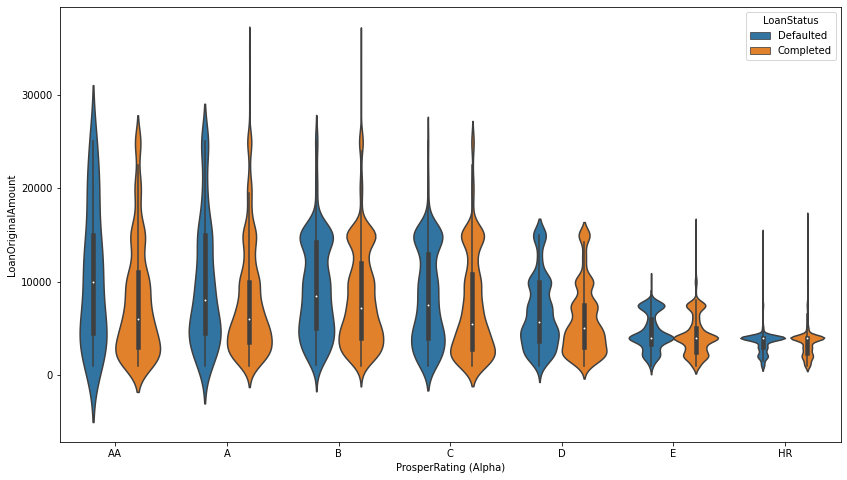

In [60]:
plt.figure(figsize = [14, 8])
sb.violinplot(data=df_prosperloan_sub, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus');

À l'exception des notes les plus basses, les crédits **Defaulted** ont tendance à être plus importants que les crédits **Completed**. À première vue, cela est en contradiction avec ce que nous avons compris dans la section précédente (les crédits **Defaulted** ont tendance à être plus petits que ceux **Completed**), mais la plupart des crédits **Defaulted** proviennent d'individus ayant une faible **ProsperRating (Alpha)** (ils ont tendance à emprunter moins) et cela conduit montant moyen du crédit **Defaulted** vers le bas.

Voyons comment `ListingCategory (numeric)`, `LoanOriginalAmount` et `LoanStatus` interagissent :

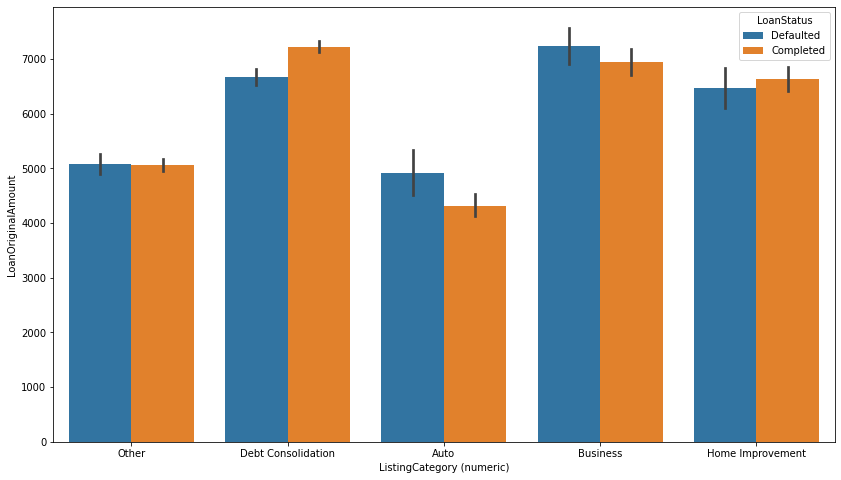

In [61]:
plt.figure(figsize = [14, 8])
sb.barplot(data=df_prosperloan_sub, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus');

Nous pouvons constater que la catégorie **Business** a tendance à avoir un montant plus important. Examinons de plus près les relations entre `ListingCategory (numeric)`, `ProsperRating (Alpha)` et `LoanStatus` .

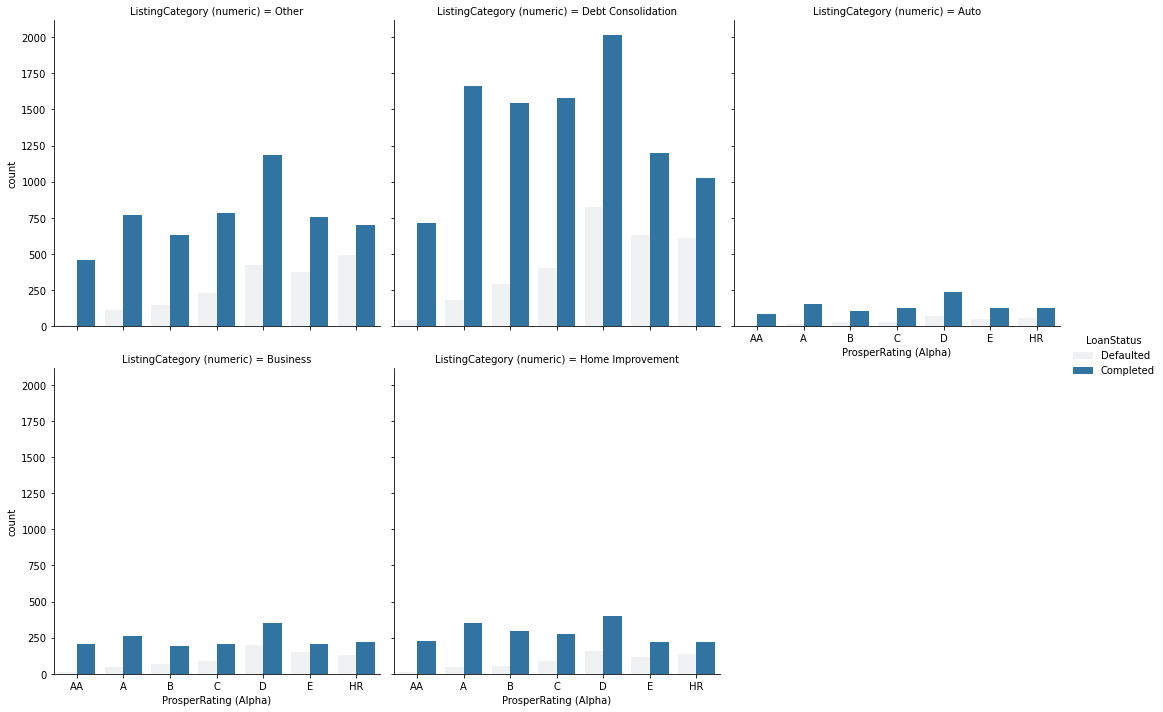

In [62]:
sb.catplot(x='ProsperRating (Alpha)', hue='LoanStatus', col='ListingCategory (numeric)', data=df_prosperloan_sub, kind='count', color=dcolor, col_wrap=3);

Nous constatons qu'il n'y ait pas de différence majeure dans les différentes catégories. Vérifions la relation entre `Term`, `ListingCategory (numeric)` et `LoanStatus` :

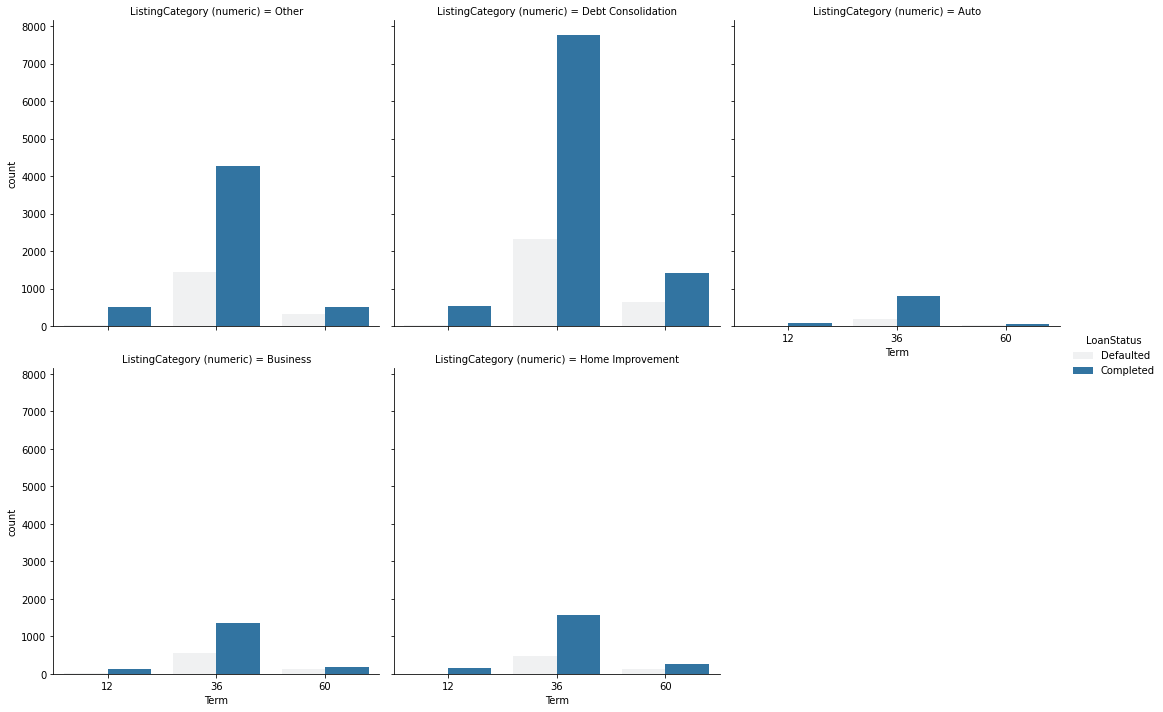

In [63]:
sb.catplot(x='Term', hue='LoanStatus', col='ListingCategory (numeric)', data=df_prosperloan_sub, kind='count', color=dcolor, col_wrap=3);

Nous pouvons voir que les crédits à long terme sont particulièrement risqués à des utilisations comme **Other**, **Business** et **Home Improvement**. Voyons ensuite la relation entre `Term`, `ProsperRating (Alpha)` et `LoanStatus` :

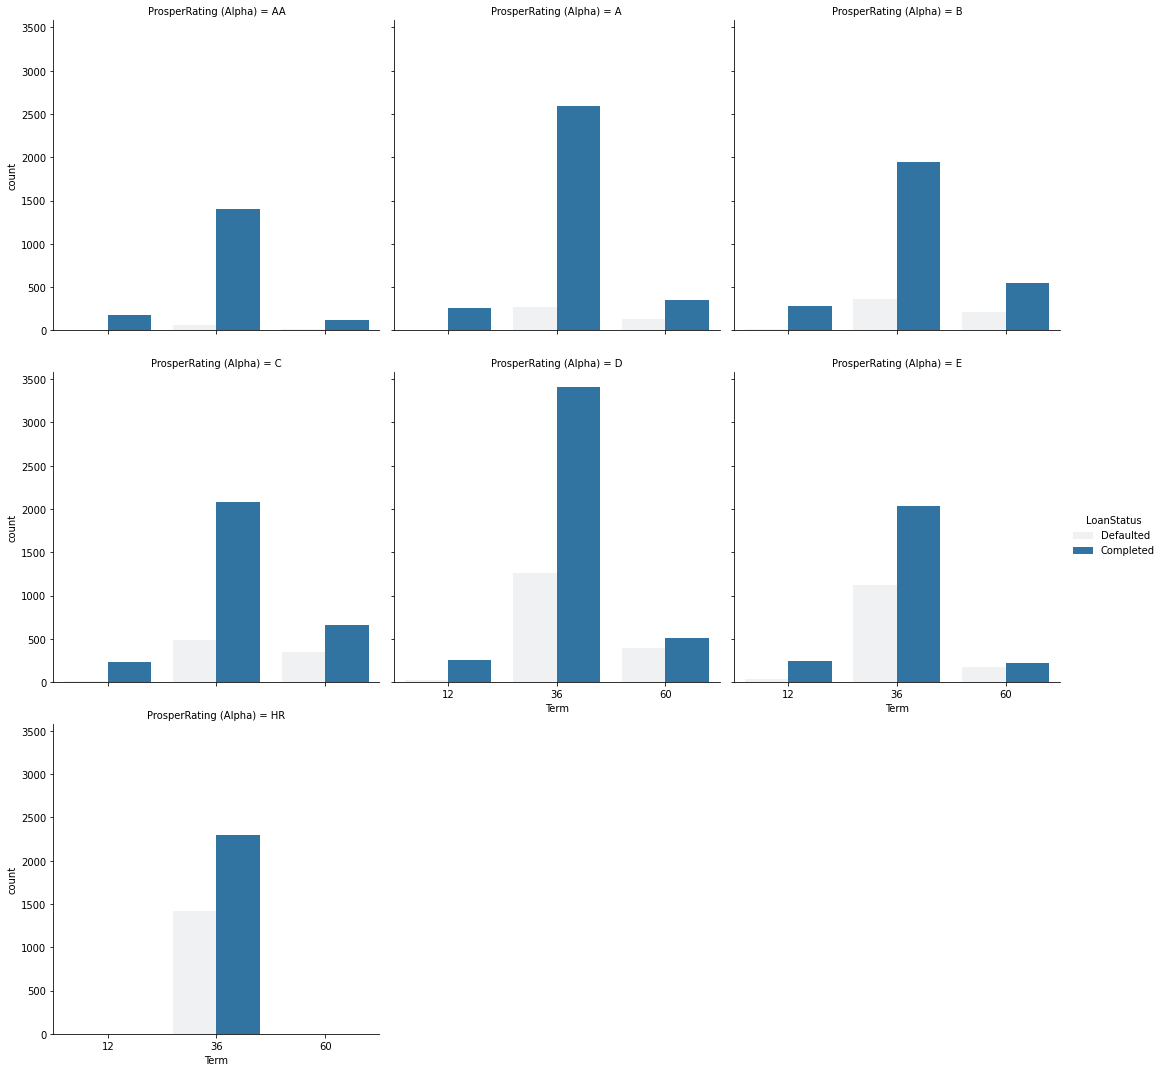

In [64]:
sb.catplot(x='Term', hue='LoanStatus', col='ProsperRating (Alpha)', data=df_prosperloan_sub, kind='count', color=dcolor, col_wrap=3);

Le crédit à long terme (60 mois) semble plus risqué que le moyen terme (36 mois) ou le court terme (12 mois). Chose intéressante, il n'y a pas de crédits à court ou à long terme pour la cote de crédit la plus basse.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Nos hypothèses initiales ont été renforcées. Le résultat du crédit dépend de `ProsperRating`, `Term`, `EmploymentStatus`. Les crédits `Defaulted` ont tendance à être plus importants que les crédits `Completed` pour toutes les notes, à l'exception des plus basses. En termes d'objectifs des crédits, les autres catégories et les catégories d'entreprises sont plus sujettes aux défauts de paiement (la catégorie des entreprises a également tendance à avoir des prêts plus importants). Les prêts à long terme (60 mois) sont plus risqués que les prêts à moyen et à court terme.

### Were there any interesting or surprising interactions between features?

Une découverte intéressante était que les crédits `Defaulted` pour les personnes ayant des `ProsperRating` élevées ont tendance à être plus importants que les crédits `Completed`. Une autre découverte intéressante est que les personnes ayant la note la plus basse (HR) n'ont que des crédits à moyen terme (36 mois).

## Conclusion


- Les `ProsperRating (Alpha)` sont presque normalement distribuées. La distribution de `StatedMonthlyIncome` est très variée : avec de nombreuses valeurs aberrantes et une très large plage de valeurs. La plupart des prêts sont inférieurs à 15 000 , il semble que la plupart des prêts soient des tranches de 5 000. La note de prospérité D est la note la plus fréquente parmi les crédits **Defaulted**.

- Les crédits **Defaulted** ont tendance à être accordés aux personnes ayant une cote inférieure. **Business** et **Home Improvement** semblent représenter un risque plus élevé. Le `BorrowerRate` a tendance à être plus élevé pour les crédits **Defaulted**. Les crédits à long terme (60 mois) sont plus risqués que les crédits à court terme (12 mois). Le **BorrowerRate** pour les personnes à faible notation est plus élevé. Un `StatedMonthlyIncome` élevé correspond à une note plus élevée. Le `EmploymentStatus` des personnes ayant des cotes inférieures tend à être **Not employed**, **Self-employed**, **Retired** ou **Part-time**.

- Les crédits **Defaulted** ont tendance à être plus importants que **Completed** pour toutes les cotes Prosper, à l'exception des plus basses.

In [65]:
!jupyter nbconvert Part_I_exploration.ipynb --to html 

[NbConvertApp] Converting notebook Part_I_exploration.ipynb to html
[NbConvertApp] Writing 1031477 bytes to Part_I_exploration.html
